# Punto # 2

In [68]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

In [91]:
sexuales = pd.read_csv('../../Data/DATOS_LIMPIOS/delitos_sexuales.csv')
extorsion = pd.read_csv('../../Data/DATOS_LIMPIOS/extorsion.csv')
homicidios = pd.read_csv('../../Data/DATOS_LIMPIOS/homicidios.csv')
intrafamiliar = pd.read_csv('../../Data/DATOS_LIMPIOS/violencia_intrafamiliar.csv')

/tmp/ipykernel_12591/2918021522.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  intrafamiliar = pd.read_csv('violencia_intrafamiliar.csv')


## Top 3 Departamentos por cada Dataframe

Text(0.5, 1.0, 'Intrafamiliar')

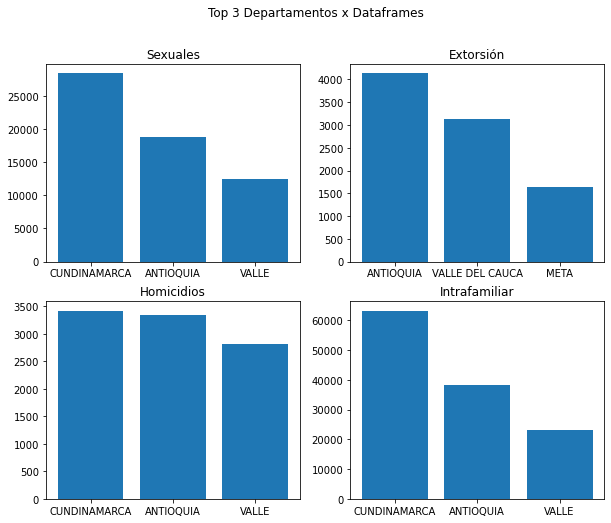

In [21]:
def arreglar_df(df):
    df['FECHA HECHO'] =  pd.to_datetime(df['FECHA HECHO'])

    df = df.set_index('FECHA HECHO')
    df = df.last('5y')
    df = df.reset_index()
    s = df['DEPARTAMENTO'].value_counts()[:3]

    indices = s.index.tolist()
    valores = s.tolist()

    return indices, valores

dfs = [sexuales, extorsion, homicidios, intrafamiliar]

indices = []
valores = []

for i in dfs:
    i, v = arreglar_df(i)
    indices.append(i)
    valores.append(v)

fig, ax = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle('Top 3 Departamentos x Dataframes')
ax[0,0].bar(indices[0], valores[0])
ax[0,0].set_title("Sexuales")
ax[0,1].bar(indices[1], valores[1])
ax[0,1].set_title("Extorsión")
ax[1,0].bar(indices[2], valores[2])
ax[1,0].set_title("Homicidios")
ax[1,1].bar(indices[3], valores[3])
ax[1,1].set_title("Intrafamiliar")
    

## Top 3 armas empleadas por dataframe (Extorsión no cuenta con esta variable)

Text(0.5, 1.0, 'intrafamiliar')

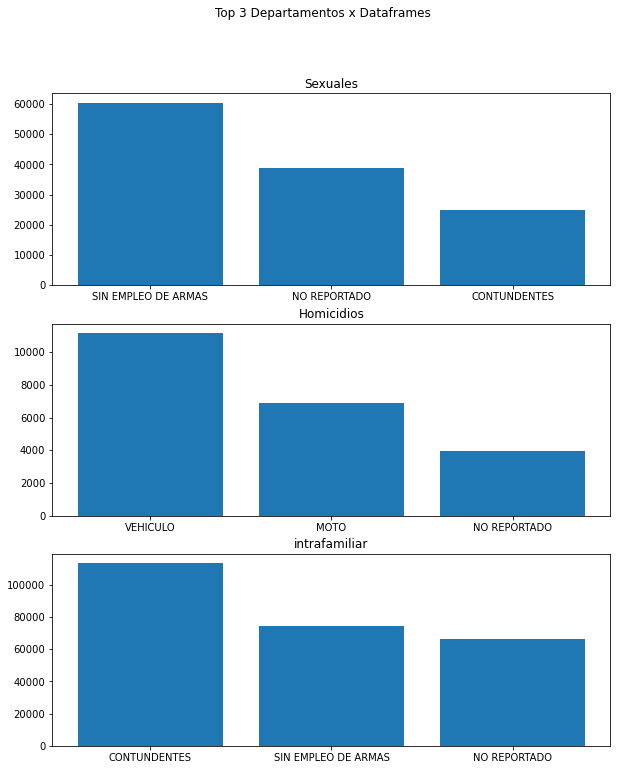

In [30]:
def arreglar_df(df):
    df['FECHA HECHO'] =  pd.to_datetime(df['FECHA HECHO'])

    df = df.set_index('FECHA HECHO')
    df = df.last('5y')
    df = df.reset_index()
    s = df['ARMAS MEDIOS'].value_counts()[:3]

    indices = s.index.tolist()
    valores = s.tolist()

    return indices, valores

dfs = [sexuales, homicidios, intrafamiliar]

indices = []
valores = []

for i in dfs:
    i, v = arreglar_df(i)
    indices.append(i)
    valores.append(v)

fig, ax = plt.subplots(3, figsize=(10,12))
fig.suptitle('Top 3 Departamentos x Dataframes')
ax[0].bar(indices[0], valores[0])
ax[0].set_title("Sexuales")
ax[1].bar(indices[1], valores[1])
ax[1].set_title("Homicidios")
ax[2].bar(indices[2], valores[2])
ax[2].set_title("intrafamiliar")
    

## Proporción por Genero, Grupo etareo y cambio a lo largo de los años

Text(0.5, 1.0, 'intrafamiliar')

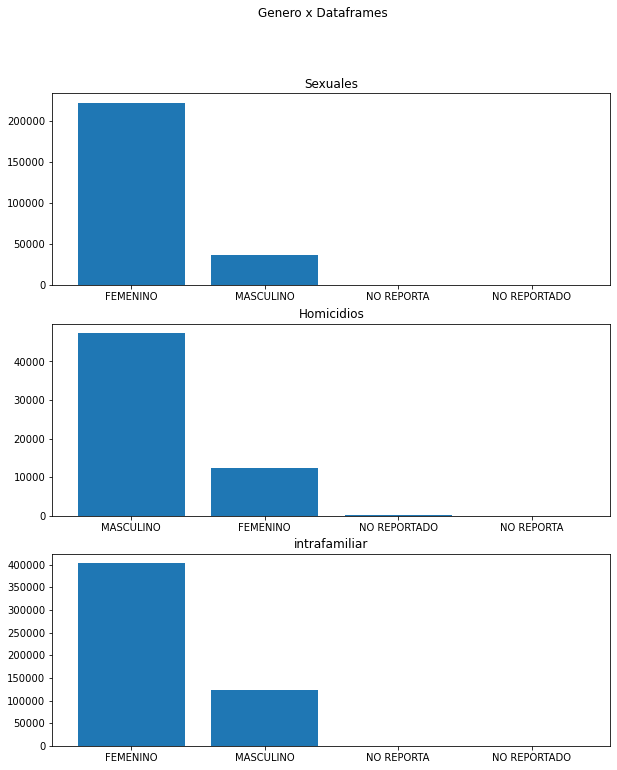

In [45]:
def arreglar_df(df):
    s = df['GENERO'].value_counts()

    indices = s.index.tolist()
    valores = s.tolist()

    return indices, valores

dfs = [sexuales, homicidios, intrafamiliar]

indices = []
valores = []

for i in dfs:
    i, v = arreglar_df(i)
    indices.append(i)
    valores.append(v)

fig, ax = plt.subplots(3, figsize=(10,12))
fig.suptitle('Genero x Dataframes')
ax[0].bar(indices[0], valores[0])
ax[0].set_title("Sexuales")
ax[1].bar(indices[1], valores[1])
ax[1].set_title("Homicidios")
ax[2].bar(indices[2], valores[2])
ax[2].set_title("intrafamiliar")

Text(0.5, 1.0, 'intrafamiliar')

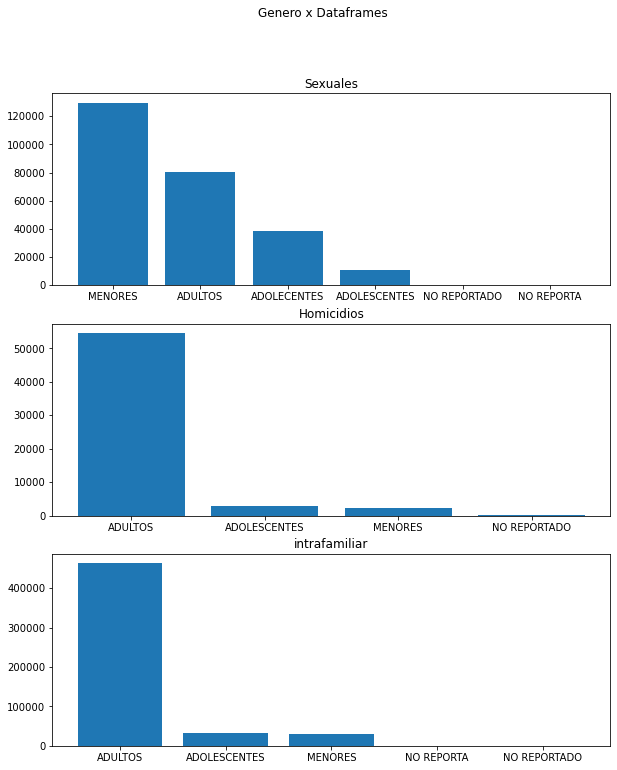

In [62]:
homicidios = homicidios.rename(columns={'GRUPO ETARÍO': 'GRUPO ETARIO'}) 

def arreglar_df(df):
    s = df['GRUPO ETARIO'].value_counts()

    indices = s.index.tolist()
    valores = s.tolist()

    return indices, valores

dfs = [sexuales, homicidios, intrafamiliar]

indices = []
valores = []

for i in dfs:
    i, v = arreglar_df(i)
    indices.append(i)
    valores.append(v)

fig, ax = plt.subplots(3, figsize=(10,12))
fig.suptitle('Genero x Dataframes')
ax[0].bar(indices[0], valores[0])
ax[0].set_title("Sexuales")
ax[1].bar(indices[1], valores[1])
ax[1].set_title("Homicidios")
ax[2].bar(indices[2], valores[2])
ax[2].set_title("intrafamiliar")

/tmp/ipykernel_12591/3264621910.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


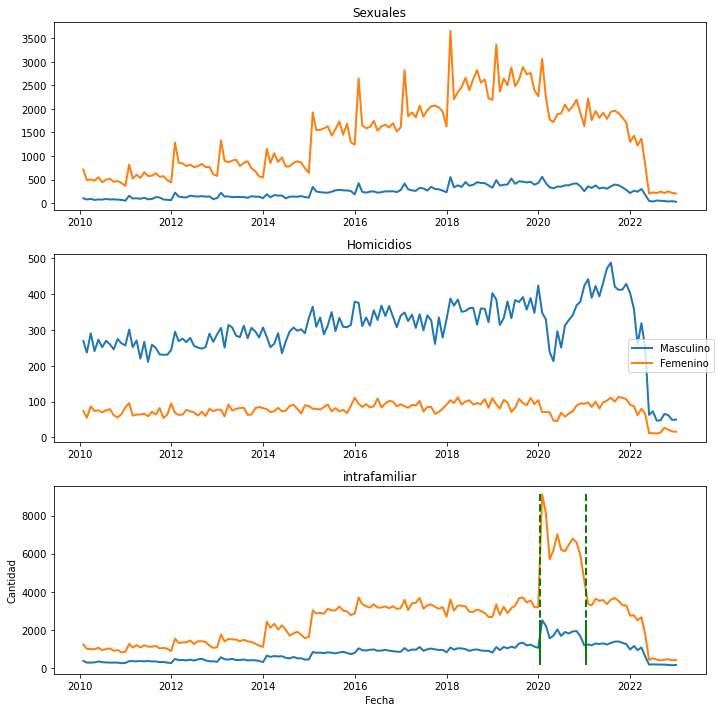

In [165]:
def arreglar_df(df):
    df['FECHA HECHO'] =  pd.to_datetime(df['FECHA HECHO'])
    df['MASCULINO'] = np.where(df['GENERO'] == 'MASCULINO', 1, 0)
    df['FEMENINO'] = np.where(df['GENERO'] == 'FEMENINO', 1, 0)
    df1 = df.resample('M', on='FECHA HECHO').sum()
    df1 = df1.reset_index()

    return df1

dfs = [sexuales, homicidios, intrafamiliar]

fig, ax = plt.subplots(3, figsize=(10,10))

count = 0

for i in dfs:
    df = arreglar_df(i)
    ax[count].plot(df['FECHA HECHO'], df['MASCULINO'],linewidth=2)
    ax[count].plot(df['FECHA HECHO'], df['FEMENINO'],linewidth=2)
    if count == 2:
        ax[count].vlines(x=['2020-01-12', '2021-01-12'], ymin = df['MASCULINO'].min(), ymax = df['MASCULINO'].max(), colors='green', ls='--', lw=2, label='Max')
        ax[count].vlines(x=['2020-01-12', '2021-01-12'], ymin = df['FEMENINO'].min(), ymax = df['FEMENINO'].max(), colors='green', ls='--', lw=2, label='Max')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad')

    count += 1



ax[0].set_title("Sexuales")
ax[1].set_title("Homicidios")
ax[2].set_title("intrafamiliar")

leyendas = ['Masculino', 'Femenino']
fig.legend(labels=leyendas, loc="center right")
fig.tight_layout()
fig.show() 

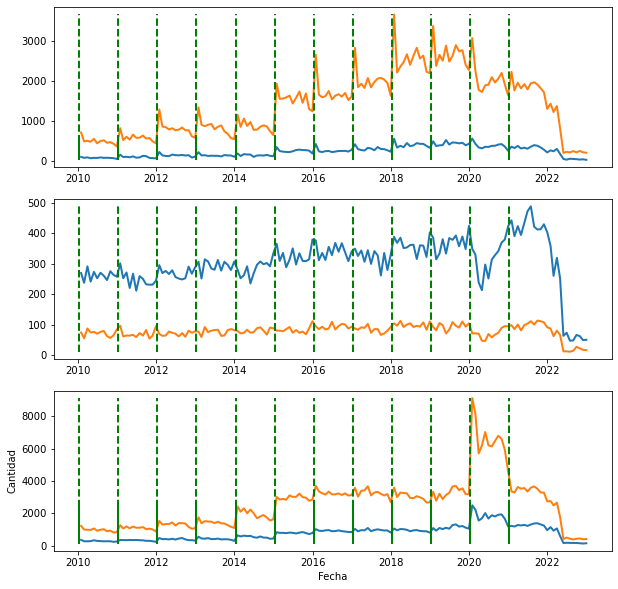

In [187]:
diciembres = []

año = 2010

for i in range(1,13):
    diciembres.append(str(año)+"-"+"01"+"-"+"12")
    año = año+1


def arreglar_df(df):
    df['FECHA HECHO'] =  pd.to_datetime(df['FECHA HECHO'])
    df['MASCULINO'] = np.where(df['GENERO'] == 'MASCULINO', 1, 0)
    df['FEMENINO'] = np.where(df['GENERO'] == 'FEMENINO', 1, 0)
    df1 = df.resample('M', on='FECHA HECHO').sum()
    df1 = df1.reset_index()

    return df1

dfs = [sexuales, homicidios, intrafamiliar]

fig, ax = plt.subplots(3, figsize=(10,10))

count = 0


for i in dfs:
    df = arreglar_df(i)
    ax[count].plot(df['FECHA HECHO'], df['MASCULINO'],linewidth=2)
    ax[count].plot(df['FECHA HECHO'], df['FEMENINO'],linewidth=2)
    ax[count].vlines(x=diciembres, ymin = df['MASCULINO'].min(), ymax = df['MASCULINO'].max(), colors='green', ls='--', lw=2, label='Max')
    ax[count].vlines(x=diciembres, ymin = df['FEMENINO'].min(), ymax = df['FEMENINO'].max(), colors='green', ls='--', lw=2, label='Max')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad')

    count += 1 


Text(0.5, 1.0, 'Sexuales')

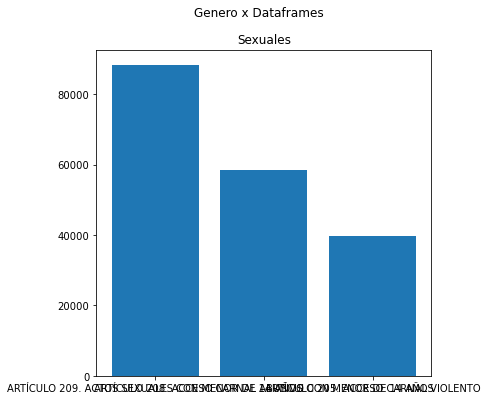

In [202]:
def arreglar_df(df):
    s = df['delito'].value_counts()[:3]

    indices = s.index.tolist()
    valores = s.tolist()

    return indices, valores

dfs = [sexuales]

indices = []
valores = []

for i in dfs:
    i, v = arreglar_df(i)
    indices.append(i)
    valores.append(v)

fig, ax = plt.subplots(1, figsize=(6,6))
fig.suptitle('Genero x Dataframes')
ax.bar(indices[0], valores[0])
ax.set_title("Sexuales")


In [199]:
indices

[['ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS',
  'ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS',
  'ARTÍCULO 205. ACCESO CARNAL VIOLENTO']]